<a href="https://colab.research.google.com/github/dclocky/DL_ASSIGNMENTS/blob/main/Assignment1_Daryn_Loughlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. i. Print out two columns of data. The first column you should print is the name of the
school and the second is the mean maths grade achieved at that school. Your output
should specify the school name and the corresponding mean maths grade on the same
line.  

In [ ]:
import pandas as pd
from pandas import read_csv
filename = "SchoolResultsFinal.csv"

data = pd.read_csv(filename)

df = pd.DataFrame(data)

School_results = df[['School','MathMean']]

print(School_results)

                                               School  MathMean
0      Henry Street School for International Studies        425
1                University Neighborhood High School        419
2                    East Side Community High School        431
3                       SATELLITE ACADEMY FORSYTH ST        370
4            Lower East Side Preparatory High School        532
..                                                ...       ...
362    EBC High School for Public Service - Bushwick        390
363                   BUSHWICK HS FOR SOCIAL JUSTICE        364
364                        Academy of Urban Planning        361
365                    ALL CITY LEADERSHIP SECONDARY        420
366  Bushwick Leaders High School for Academic Excel        345

[367 rows x 2 columns]


Q1 ii. Calculate the mean number of students from the dataset (based on the
NumberStudents column).

Next produce two dataframes: (i) The first should contain the details (all columns) of
all schools that have more than the mean number of students. (ii) The second should
contain the details of all schools that have less than or equal to the mean number of
students.

Finally print out the average of the MathMean, ReadingMean and WritingMean for
each of the two dataframes above.

In [ ]:
df.columns

Index(['DBN', 'School', 'NumberStudents', 'ReadingMean', 'MathMean',
       'WritingMean'],
      dtype='object')

In [ ]:
#Mean Number of students taken from the Number of students column
df.NumberStudents.mean()

103.87465940054496

In [ ]:
x = df.NumberStudents.mean()

MoreThan = []
LessThan = []

for i in range(len(df)):
    if int(df.NumberStudents[i])<=x:

        LessThan.append(df.loc[i])
    else:
        MoreThan.append(df.loc[i])

#i dataframe that prints all columns of schools that have more than mean of students
MoreThan_df = pd.DataFrame(MoreThan)

#i dataframe that prints all columns of schools that have less than mean of students
LessThan_df = pd.DataFrame(LessThan)

#print out the average of the MathMean, ReadingMean and WritingMean for
#each of the two dataframes above.

print("Schools with more Than the Mean of Students have a :")
print("Math Mean of:",MoreThan_df.MathMean.mean())
print("Reading Mean of:",MoreThan_df.ReadingMean.mean())
print("Writing Mean of:",MoreThan_df.WritingMean.mean())
print("")
print("Schools with Less Than the Mean of Students have a :")
print("Math Mean of:",LessThan_df.MathMean.mean())
print("Reading Mean of:",LessThan_df.ReadingMean.mean())
print("Writing Mean of:",LessThan_df.WritingMean.mean())

Schools with more Than the Mean of Students have a :
Math Mean of: 469.09411764705885
Reading Mean of: 442.9764705882353
Writing Mean of: 438.85714285714283

Schools with Less Than the Mean of Students have a :
Math Mean of: 396.8758865248227
Reading Mean of: 393.40070921985813
Writing Mean of: 386.46762589928056


In [ ]:
Q1. iii. The next task is to output the mean writing value for all schools in each district.
Your code should print out a line for each district with the ID of the district (DBN)
and the average writing grade achieved by the schools (collectively) in that district.

A sample output is shown.  For example, in the output we can see that schools in
district 5 have an average writing mean of 420.1428.

Finally, your code should visualize this information using a bar graph (see below).


In [ ]:
df.groupby('DBN').WritingMean.mean()


DBN
1     433.125000
2     417.839286
3     422.090909
4     390.375000
5     420.142857
6     372.833333
7     383.714286
8     372.266667
9     382.055556
10    393.461538
11    373.823529
12    361.187500
13    399.642857
14    379.538462
15    373.916667
16    384.666667
17    379.142857
18    399.666667
19    365.250000
20    400.400000
21    378.857143
22    464.200000
23    371.571429
24    403.000000
25    427.333333
26    448.800000
27    384.714286
28    444.250000
29    391.800000
30    452.857143
31    457.222222
32    367.833333
Name: WritingMean, dtype: float64

<AxesSubplot:xlabel='DBN'>

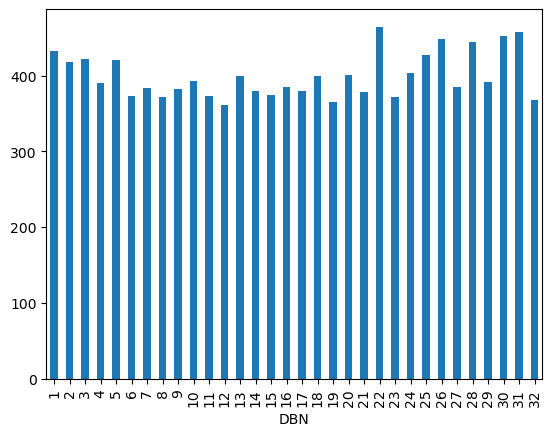

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

DBN_Writing_Mean = df.groupby('DBN').WritingMean.mean()

DBN_Writing_Mean.plot(kind = 'bar')


In [ ]:
#Q2 i. For the next task we will compare the mean reading, writing and maths values across
#each district. In other words we are interested in seeing if the mean reading, writing
#and maths grades are similar in each district. You should produce a line graph as
#shown below. The x-axis corresponds to each district (numbered 1-32). The y-axis
#correspond to the reading and writing mean score achieved.

<AxesSubplot:xlabel='DBN'>

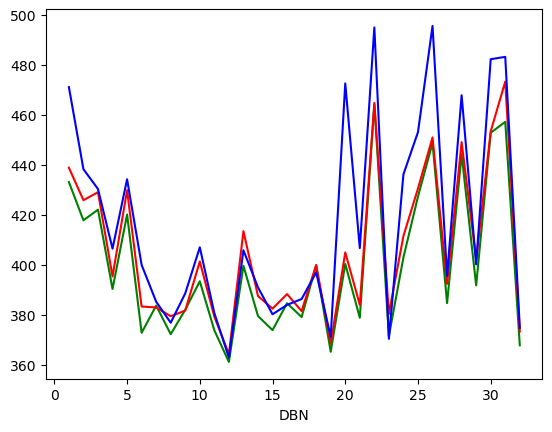

In [ ]:
#Label the colour graphs

DBN_Reading_Mean = df.groupby('DBN').ReadingMean.mean()
DBN_Math_Mean = df.groupby('DBN').MathMean.mean()
DBN_Writing_Mean.plot(kind = 'line',color = 'g')
DBN_Reading_Mean.plot(kind = 'line',color = 'r')
DBN_Math_Mean.plot(kind = 'line',color = 'b')

In [ ]:
#Q2 ii. The objective of this question is to visualize the relationship between the MathMean
#columns and the other two mean columns for reading and writing. Create two
#separate scatter plots. The first should plot the relationship between MathMean and
#ReadingMean. The second scatter plot should plot the relationship between the
#MathMean and WritingMean variables.

Text(0, 0.5, 'Writing Mean')

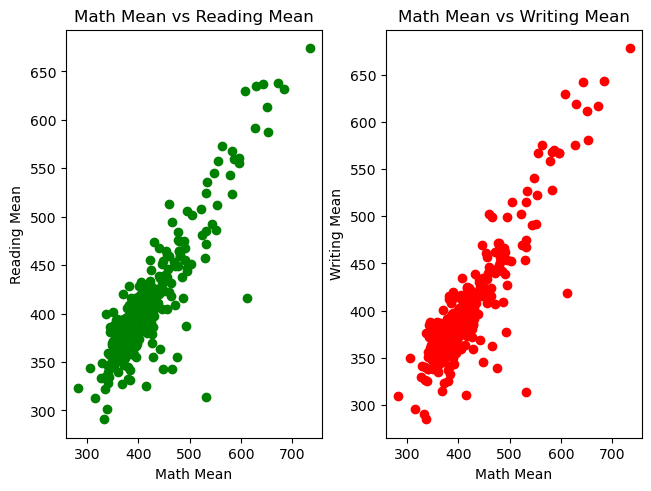

In [ ]:
#DOUBLE CHECK THIS ANSWER - IS IT ANSWERING THE QUESTION AND COMPARING
plt.subplot(1,2,1)
plt.scatter(df.MathMean, df.ReadingMean,color = 'green')
plt.title("Math Mean vs Reading Mean")
plt.xlabel('Math Mean')
plt.ylabel('Reading Mean')

plt.subplot(1,2,2)
plt.scatter(df.MathMean, df.WritingMean,color = 'red')
plt.title("Math Mean vs Writing Mean")
plt.xlabel('Math Mean')
plt.ylabel('Writing Mean')


In [ ]:
#Q3 i.There are a number of missing values in the ‘WritingMean’ column. Determine the
#number of missing values in this column and then replace all missing values in the
#‘WritingMean’ column with the median value of the ‘WritingMean’ column.

In [ ]:
sum(df.WritingMean.isnull())

5

In [ ]:
#check
filler = df.WritingMean.median()
df.WritingMean.fillna(filler)

0      385.0
1      387.0
2      402.0
3      378.0
4      314.0
       ...  
362    376.0
363    358.0
364    353.0
365    395.0
366    351.0
Name: WritingMean, Length: 367, dtype: float64

In [ ]:
sum(df.WritingMean.isnull())

5

In [ ]:
#Q3 ii. Write code that will allow a user to filter the dataset by specifying an upper and lower
#bound limit for the MathMean column.

#The program will ask the user to enter the upper bound and lower bound values for
#the MathMean column. The program should then print out the dataset such that all
#rows printed will have a MathMean value greater than the lower bound and less than
#the upper bound.

#Notice in the output below we select an upper bound of 445 and a lower bound of
#440 for the MathMean column. The results contain all rows from the dataset with a
#MathMean value between the two bounds.

In [ ]:
upperLimit = int(input("input the upper limit for the Math Mean Column :"))
lowerLimit = int(input("input the upper limit for the Math Mean Column :"))
inRangeOfLimits = []
for i in range(len(df)):
    if int(df.MathMean[i])<=upperLimit & int(df.MathMean[i])>=lowerLimit:
        inRangeOfLimits.append(df.loc[i])

inRangeOfLimits_df = pd.DataFrame(inRangeOfLimits)

inRangeOfLimits_df

input the upper limit for the Math Mean Column :445
input the upper limit for the Math Mean Column :440


,DBN,School,NumberStudents,ReadingMean,MathMean,WritingMean
51,2,City as School,57,468,441,434.0
80,4,YOUNG WOMEN LEADERSHIP SCHOOL,48,451,445,470.0
162,10,DeWitt Clinton High School,438,425,440,417.0
302,24,ROBERT F WAGNER JR SECONDARY,49,420,440,421.0
355,31,CURTIS HIGH SCHOOL,373,439,441,430.0
